<a href="https://colab.research.google.com/github/appliedgeometry/Geometria-Analitica/blob/master/7_Coordenadas_Esfericas_y_Cilindricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coordenadas Esféricas y Cilíndricas

Los husos horarios y las coordenadas que usan los marineros son una muestra de la utilidad de las coordenadas esféricas en nuestro globo terráqueo. Tanto esas coordenadas como las cilíndricas son una generalización de las coordenadas polares del plano al caso del espacio. Surgen de manera natural en problemas de radiación y se utilizaran en la parte de integración en cálculo de varias
variables.

## Conversión entre Coordenadas Esféricas y Cartesianas

Consideremos un plano fijo en el espacio, en el cual se introduce un sistema coordenado polar con eje polar $X$ y polo $O$, y una recta perpendicualr a dicho plano que denotaremos por $Z$ y en la cual elegimos como rayo positivo el que con el eje polar y el conjugado dé lugar a un sistema derecho. Entonces cualquier punto $P$ del espacio determina tres números llamados las ___coordenadas esféricas___ del punto $P$.


*   La distancia del punto al _polo_ se denotará por $r$.
*   El ángulo entre el semiplano $XZ$ y el semiplano por la recta $Z$ que contiene al punto $P$, se denotará por $\theta$ y es tal que $0\leq \theta < 2\pi$.
*  El ángulo entre el rayo positivo del eje $Z$ y el rayo $OP$, se denotará por $\phi$ y es tal que $0\leq \phi < \pi$.   

Cuando se tienen dos sistemas coordenados para un mismo espacio resulta natural el preguntarse si existe una manera de 'pasar' de una a otra. Para el caso del espacio $\mathbb{R}^{3}$, es sabido que las fórmulas para obtener las coordenadas cartesianas $(x,y,z)$ de un punto $(r_0,\theta_0,\phi_0)$ en coordenadas esféricas son:
    \begin{align*}
        x &= r_0\cos(\theta_{0})\sin(\phi_0), \\
        y &= r_0\sin(\theta_{0})\sin(\phi_0)\\
        z &= r_0\cos(\phi_0).
    \end{align*}
    
Recíprocamente, las fórmulas para obtener las coordenadas esféricas $(r,\theta,\phi)$ de un punto $(x_{0},y_{0},z_0)$ en coordenadas cartesianas son:
    \begin{align*}
        r &= \sqrt{x_{0}^2+y_{0}^2+z_0^{2}}, \\
        \theta &= \arctan{\frac{y_{0}}{x_{0}}}\\
        \phi & = \arccos{\frac{z_0}{\sqrt{x_{0}^2+y_{0}^2+z_0^{2}}}}.
    \end{align*}

Utilizando el módulo de `SymPy` podemos construir una función en Python que nos ayude a hacer estas conversiones:


In [1]:
import sympy as sym

def spherical_to_cartesian(rr, theta, phi):
  if 0 <= theta < 2*sym.pi and 0 <= phi < sym.pi:
    xx = rr * sym.cos(theta)*sym.sin(phi)
    yy = rr * sym.sin(theta)*sym.sin(phi)
    zz = rr * sym.cos(phi)
    return(xx, yy, zz)
  else:
    return('Ángulos fuera de rango')

def cartesian_to_spherical(x, y, z): 
  rr = sym.sqrt(x**2 + y**2 + z**2)
  theta = sym.atan2(y, x)
  phi = sym.acos(z/rr)
  return(rr, theta, phi)

Veamos ahora algunos ejemplos de cómo utilizar estas funciones.

Primero, como cambiar de coordenadas esféricas a cartesianas:

In [2]:
# De esféricas a cartesianas

spherical_to_cartesian(1, sym.pi/2, sym.pi/4)
spherical_to_cartesian(1, 1, 1)
spherical_to_cartesian(1., 1., 1.)
spherical_to_cartesian(2, 4*sym.pi/3, 2*sym.pi/3)

(-sqrt(3)/2, -3/2, -1)

Luego, cambiar de coordenadas cartesianas a coordenadas esféricas:

In [3]:
# De cartesianas a esféricas

cartesian_to_spherical(1, 1, 0)
cartesian_to_spherical(0, sym.sqrt(2)/2, sym.sqrt(2)/2)
cartesian_to_spherical(-sym.sqrt(3)/2, -3/2, -1)

(2.00000000000000, -pi + atan(1.0*sqrt(3)), 2.09439510239320)

Se puede también componer las funciones: 

In [4]:
# Composición de funciones:

A=spherical_to_cartesian(2, 4*sym.pi/3, 2*sym.pi/3)
cartesian_to_spherical(A[0], A[1], A[2])

(2, -2*pi/3, 2*pi/3)

In [5]:
import numpy as np

-np.pi + np.arctan(1.0 * np.sqrt(3))

-2.0943951023931957

In [6]:
# Forma 2 de cartesianas a esfericas: 

import numpy as np
import sympy as sym

def cartesian_to_spherical(x, y, z): 
   rr = np.sqrt(x**2 + y**2 + z**2)
   theta = np.arctan2(y, x)
   phi = np.arccos(z/rr)
   return(rr, theta, phi)

In [7]:
#Forma 2:

cartesian_to_spherical(-np.sqrt(3)/2, -3/2, -1)

(2.0, -2.0943951023931953, 2.0943951023931957)

## Conversión entre Coordenadas Cilíndricas y Cartesianas

Existen muchas situaciones dónde el etner una descripción usando cilindros es muy útil. Por ejemplo, en cualquier fenómeno que tenga una simetría rotacional a lo largo de un eje, como sucede en un flujo transportando dentro de un tubo. Las mediciones de tomografías computarizadas se hacen sobre cilindros que contienen los sensores que detectan una señal, en la superficie del cilindro, y la convierten en datos que se pueden representar en tres dimensiones. Al tener un objeto recto metálico que se calienta, el calor que despide se disipa en la direccion transversal y los conjuntos que tienen la misma temperatura, es decir *isotérmicos*, forman cilindros al rededor del objeto. Este sistema de coordnadas es muy útil n topología, para poder describir vecindades de nudos en 3D. En geometría se usa para simplificar los sistemas de ecuaciones que se estudian en espacios de dimensión 3. 

Consideremos un plano con un sistema coordenado polar cuyo eje polar denotamos por $X$, y tracemos por el polo una recta perpendicular que denotaremos por $Z$ en la cual elegimos un rayo positivo. Entonces, cualquier punto $P$ del espacio que no pertenezca a la recta $Z$ determina tres números reales en la forma siguiente:


*   La _distancia_ del punto $P$ a la recta perpendicular $Z$, que denotaremos por $r$.
*   El _ángulo_ entre los semiplanos $XZ$ y $PZ$, que denotaremos por $\theta$ y cuyo intervalo de variación será $[0,2\pi)$.
*   La _altura_ orientada sobre el plano elegido, acorde a la orientación en la recta coordenada $Z$ y que denotaremos por $z$.

Los números de la terna $(r,\theta, z)$ se denominan las coordenadas cilíndricas del punto $P$ y suelen escribirse en ese orden.


¿Cuál es el lugar correspondiente a la ecuación $r=constante$?

¿Cuál es el lugar geométrico correspondiente a la ecuación $\theta=constante$?

¿Cuál es el lugar geométrico correspondiente a la ecuación $z=constante$?

Para obtener la realción entre las coordenadas cilíndricas y las cartesianas, vamos a considerar como eje $X$ a la recta que contiene el eje polar, como eje $Z$ a la recta perpendicular al plano fijo y como eje $Y$ a la recta perpendicular a las dos anteriores con la orientación adecuada para que el sistema resulte derecho. Entonces, el punto $P$ de coordenadas cilíndricas $(r_0,\theta_0,z_0)$ tiene coordenadas cartesianas:

\begin{align*}
        x &= r_0\cos(\theta_{0}), \\
        y &= r_0\sin(\theta_{0})\\
        z &= z_0.
    \end{align*}

Recíprocamente, si conocemos las coordenadas cartesianas $(x_0,y_0,z_0)$ del punto $P$, sus coordenadas cilíndricas son:

\begin{align*}
        r &= \sqrt{x_{0}^2+y_{0}^2}, \\
        \theta &= \arctan{\frac{y_{0}}{x_{0}}}\\
        z & = z_0.
    \end{align*}


Ahora veamos como se implementa esto en código:

In [8]:
import sympy as sym

def cylindrical_to_cartesian(rr, theta, zz):
  if 0<= theta < 2*sym.pi:
    xx = rr * sym.cos(theta)
    yy = rr * sym.sin(theta)
    return(xx, yy, zz)
  else:
    return('Ángulos fuera de rango')

def cartesian_to_cylindrical(x, y, z): 
  rr = sym.sqrt(x**2 + y**2)
  theta = sym.atan2(y, x)
  return(rr, theta, z)


Para cambiar de coordinadas cilíndricas a cartesianas podemos ejecutar lo siguiente:

In [9]:
# Cilíndricas a cartesianas

cylindrical_to_cartesian(1, sym.pi/2, -2)
cylindrical_to_cartesian(1, 1, 1)
cylindrical_to_cartesian(1., 1., 1.)
cylindrical_to_cartesian(2, 4*sym.pi/3, -1)

(-1, -sqrt(3), -1)

Para cambiar de coordenadas cartesianas a cilíndricas:

In [10]:
# Cartesiana a cilíndricas:

cartesian_to_cylindrical(0, 1, -2)
cartesian_to_cylindrical(-1, -sym.sqrt(3), -1)
cartesian_to_cylindrical(sym.cos(1), sym.sin(1), 1)

(sqrt(cos(1)**2 + sin(1)**2), atan(sin(1)/cos(1)), 1)

In [11]:
# Composición de funciones:

A=cylindrical_to_cartesian(1, 1, 1)
cartesian_to_cylindrical(A[0], A[1], A[2])

(sqrt(cos(1)**2 + sin(1)**2), atan(sin(1)/cos(1)), 1)

## Gráfica de regiones en coordenadas esféricas

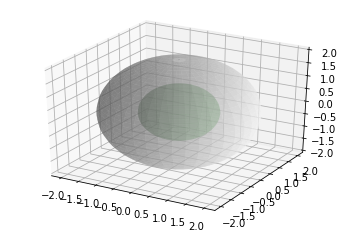

In [12]:
# r = constante
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

theta = np.linspace(0, 2*np.pi, 40)
phi = np.linspace(0, np.pi, 40)
THETA, PHI = np.meshgrid(theta, phi)

R_a = 1

X = R_a * np.sin(PHI) * np.cos(THETA)
Y = R_a * np.sin(PHI) * np.sin(THETA)
Z = R_a * np.cos(PHI)

# plot = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet') , linewidth=0 , antialiased=False , alpha=0.5)
plot = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='g', linewidth=0, alpha=0.3)

# Gráfica a < R < b
R_b = 2

X = R_b * np.sin(PHI) * np.cos(THETA)
Y = R_b * np.sin(PHI) * np.sin(THETA)
Z = R_b * np.cos(PHI)

plot = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='w', linewidth=0, alpha=0.5)
plt.show()

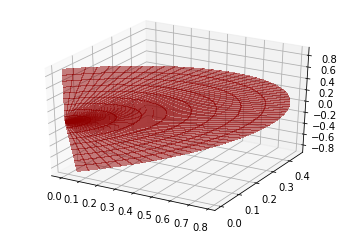

In [13]:
# Theta = constante
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

THETA = np.arange(0, 2*np.pi - 0.001, 40)
PHI = np.arange(0, np.pi + 0.001, 0.05)
R = np.arange(0, 1, 0.1)

theta, phi = np.meshgrid(THETA, PHI)
theta_a = np.pi/6

X = R * np.sin(phi) * np.cos(theta_a)
Y = R * np.sin(phi) * np.sin(theta_a)
Z = R * np.cos(phi)

plot = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='r', linewidth=0, antialiased=False, alpha=0.5)

# Región a <= theta <= b
# theta_b = np.pi/3
# X = R * np.sin(phi) * np.cos(theta_b) 
# Y = R * np.sin(phi) * np.sin(theta_b)
# Z = R * np.cos(phi)
# plot = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='g', linewidth=0, antialiased=False,  alpha=0.5)

plt.show()

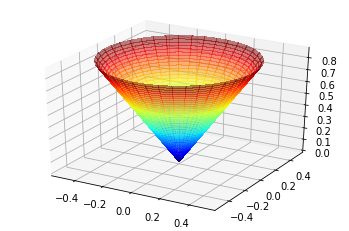

In [14]:
# phi = constante
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

theta, r = np.linspace(0, 2 * np.pi, 40), np.linspace(0, 1, 40)
THETA, R = np.meshgrid(theta, r)

PHI = np.pi/6

X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
plot = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'), linewidth=0, antialiased=False, alpha=0.5)

# Región a <= phi <= b
# PHI = np.pi/4

# X = R * np.sin(PHI) * np.cos(THETA)
# Y = R * np.sin(PHI) * np.sin(THETA)
# Z = R * np.cos(PHI)

# plot = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'), linewidth=0, antialiased=False, alpha=0.5)

plt.show()

## Gráfica de regiones en coordenadas cilíndricas

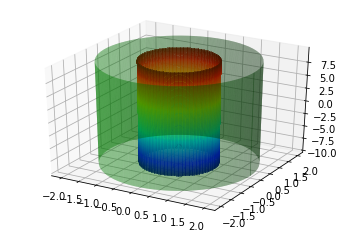

In [15]:
# r = constante

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

theta = np.arange(0, 2*np.pi + 0.1, 0.09)
zz = np.arange(-10, 10, 0.1)
THETA, ZZ = np.meshgrid(theta, zz)

R_a = 1

X = R_a * np.cos(theta)
Y = R_a * np.sin(theta)
Z = ZZ

plot = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'), linewidth=0, antialiased=False, alpha=0.5)
#plot = ax.plot_surface(X, Y, Z,  rstride=1, cstride=1, color='b', linewidth=0, alpha=0.3)

#Gráfica a < R < b
 
R_b=2

X = R_b * np.cos(theta)
Y = R_b * np.sin(theta)
Z = ZZ

plot = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='g', linewidth=0, alpha=0.5)
plt.show()